In [82]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

### Line Graphs

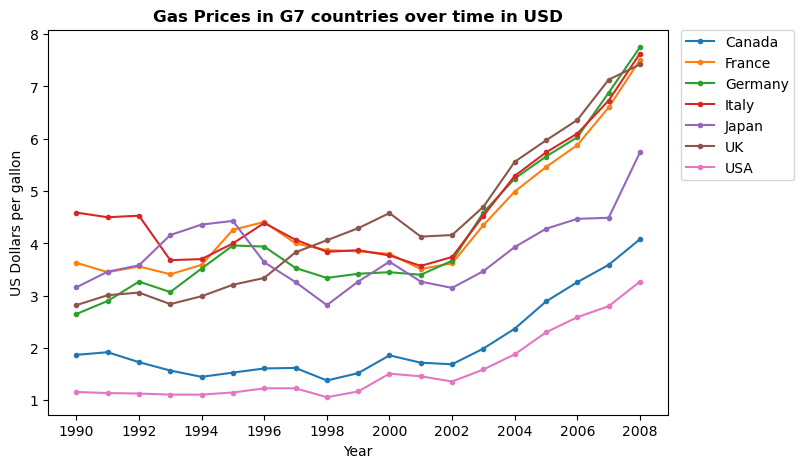

In [170]:
gas_data = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8 ,5))

plt.title("Gas Prices in G7 countries over time in USD", fontdict={'fontweight':'bold', 'fontsize':12})

# plt.plot(gas_data.Year, gas_data.USA, 'b.-',label="United States")
# plt.plot(gas_data.Year, gas_data.Canada , 'g.-', label="Canada")
# plt.plot(gas_data.Year,gas_data['South Korea'], 'r.-', label ="South Korea")

countries = ['UK', 'Canada', 'France', 'Germany', 'USA', 'Japan', 'Italy']

for country in gas_data:
    if country in countries:
        plt.plot(gas_data.Year, gas_data[country], marker = '.', label=country)
        

plt.xticks(gas_data.Year[::2])

plt.xlabel('Year')
plt.ylabel('US Dollars per gallon')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.gcf()
plt.savefig("Gas_price_figure.png", dpi=300)

plt.show()



### Creating different Graphs using data from FIFA (csv)

In [84]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

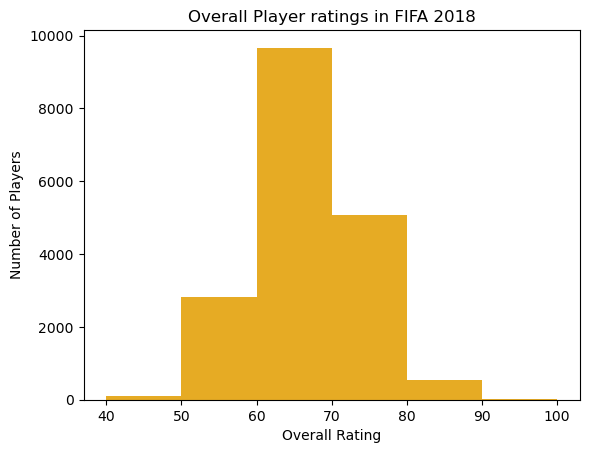

In [171]:
bins = []

for i in range(4,11):
    bins.append(i*10)

plt.hist(fifa.Overall, bins=bins, color="#e6ab24")

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Overall Rating')

plt.title('Overall Player ratings in FIFA 2018')
plt.gcf()
plt.savefig("fifa_players_ratings.png", dpi=300)
plt.show()


### Pie Charts

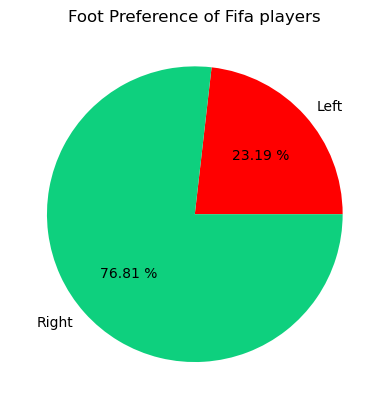

In [172]:
fifa
left = fifa.loc[fifa["Preferred Foot"] == 'Left'].count()[0]
right = fifa.loc[fifa["Preferred Foot"] == 'Right'].count()[0]

labels = ["Left", "Right"]
colors = ['red', '#0ed07e']
plt.pie([left,right], labels = labels, colors=colors, autopct= '%.2f %%')
plt.title('Foot Preference of Fifa players')
plt.gcf()
plt.savefig("Preferred_foot_amongst_fifa_players.png", dpi=300)
plt.show()


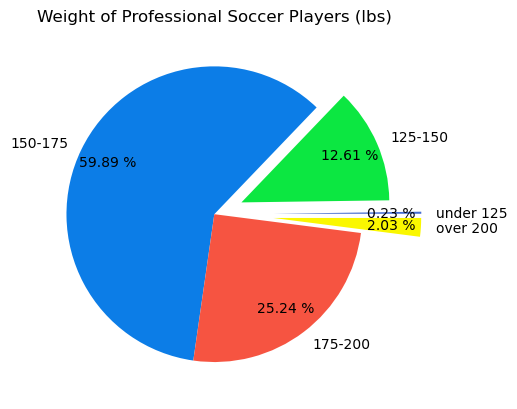

In [173]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]
fifa.Weight

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

colors = ['#456dd2', '#0ce741', '#0c7de7', '#f65441', '#faf700']
plt.pie(weights, labels=label, colors = colors, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.gcf()
plt.savefig("Weight_of_fifa_players.png", dpi=300)
plt.show()


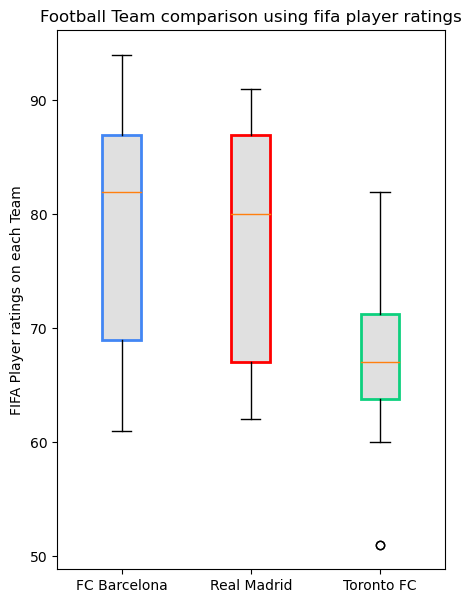

In [174]:
plt.figure(figsize=(5,7))
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
toronto = fifa.loc[fifa.Club == 'Toronto FC']['Overall']
labels = ['FC Barcelona', 'Real Madrid', 'Toronto FC' ]
boxes = plt.boxplot([barcelona,madrid, toronto], labels=labels, patch_artist = True)

counter = 0
colors = ['#4286f4', 'red','#0ed07e']
for box in boxes['boxes']:
    box.set(color=colors[counter], linewidth=2)
    box.set(facecolor='#e0e0e0')
    counter += 1

    
plt.title('Football Team comparison using fifa player ratings')
plt.ylabel('FIFA Player ratings on each Team')
plt.gcf()
plt.savefig("Comparisons_of_fifa_teams.png", dpi=300)
plt.show()




